In [1]:
"""
Author: Anuradha Wadekar
Title: Flight-Price-Prediction
Data Source: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
"""

'\nAuthor: Anuradha Wadekar\nTitle: Flight-Price-Prediction\nData Source: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction\n'

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Importing the data
df = pd.read_csv(r"C:\Python\Python39\Scripts\PythonProjects\3 Airlines-Ticket-Price-Analysis\Dataset\Indian Airlines.csv")

df.head(7)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060


In [7]:
df.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [71]:
df.shape

(300153, 12)

In [72]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [9]:
print(df["flight"])
print(df.source_city)
df.info()

0         SG-8709
1         SG-8157
2          I5-764
3          UK-995
4          UK-963
           ...   
300148     UK-822
300149     UK-826
300150     UK-832
300151     UK-828
300152     UK-822
Name: flight, Length: 300153, dtype: object
0           Delhi
1           Delhi
2           Delhi
3           Delhi
4           Delhi
           ...   
300148    Chennai
300149    Chennai
300150    Chennai
300151    Chennai
300152    Chennai
Name: source_city, Length: 300153, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_tim

In [74]:
# We can also see the number of unique users and items in the dataset.
df.nunique()

Unnamed: 0          300153
airline                  6
flight                1561
source_city              6
departure_time           6
stops                    3
arrival_time             6
destination_city         6
class                    2
duration               476
days_left               49
price                12157
dtype: int64

In [75]:
# check for duplicates
df.duplicated().sum()

0

In [76]:
# check for missing values
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [29]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [16]:
df['airline'].value_counts()
df['source_city'].value_counts()


Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [17]:
for col in df:
    if df[col].dtype == 'object':
        print(df[col].unique())

['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
['zero' 'one' 'two_or_more']
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
['Economy' 'Business']


[Text(0.5, 1.0, 'No. of flight by Airlines')]

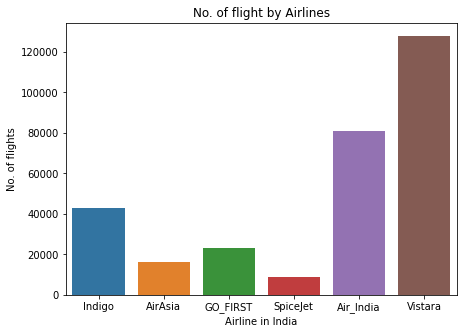

In [11]:
# the distribution of airlines
plt.figure(figsize=(7,5))
c=sns.countplot(x='airline', data=df.sort_values('price') )
c.set(xlabel='Airline in India', ylabel='No. of flights')
c.set(title='No. of flight by Airlines')


<Figure size 432x288 with 0 Axes>

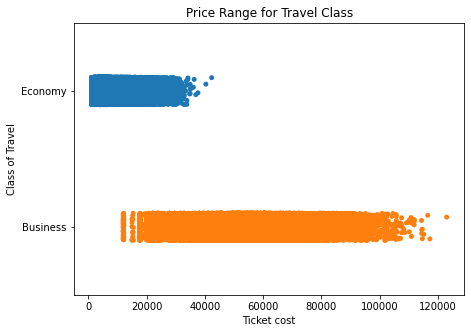

In [25]:
# the distribution of price range
plt.figure(1)
plt.figure(figsize=(7,5))
c = sns.stripplot(x='price', y='class', data = df)
c.set(xlabel='Ticket cost', ylabel='Class of Travel')
c.set(title='Price Range for Travel Class')
plt.show()


[Text(0.5, 1.0, 'Passenger as per Travel Class')]

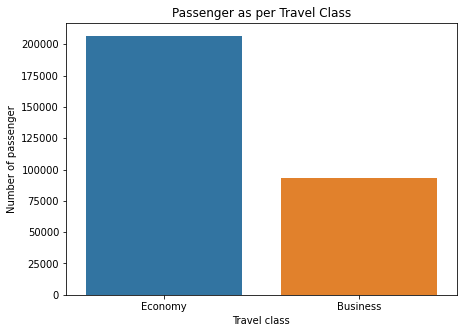

In [22]:
# the distribution of airlines
plt.figure(figsize=(7,5))
c=sns.countplot(x='class', data=df )
c.set(xlabel='Travel class', ylabel='Number of passenger')
c.set(title='Passenger as per Travel Class')


[Text(0.5, 1.0, 'Price Vs Duration of Flight for Different Airlines')]

<Figure size 432x288 with 0 Axes>

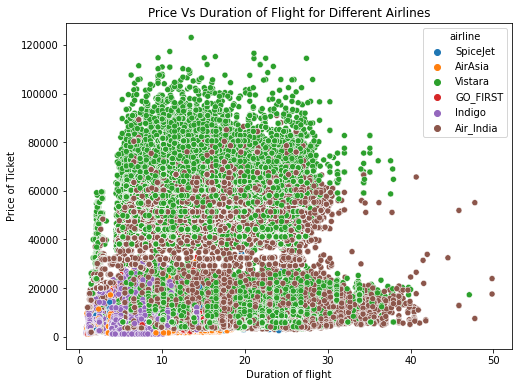

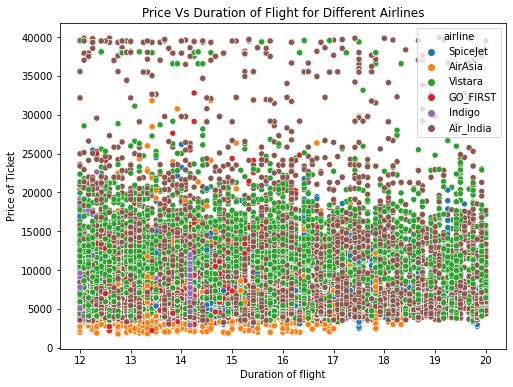

In [92]:
plt.figure(1)
plt.figure(figsize=(8,6))
c = sns.scatterplot(x=df['duration'], y=df['price'], hue= df['airline'], data=df)
c.set(xlabel='Duration of flight', ylabel='Price of Ticket')
c.set(title='Price Vs Duration of Flight for Different Airlines')

plt.figure(2)
plt.figure(figsize=(8,6))
#c = sns.scatterplot(x=df['duration'], y=df['price'], hue= df['airline'], data=df)'
xrange=df.loc[(df['duration'] >= 12) & (df['duration'] <= 20) ].duration
yrange=df.loc[df['price'] <= 40000 ].price
c = sns.scatterplot(x=xrange, y=yrange, hue= df['airline'], data=df)
c.set(xlabel='Duration of flight', ylabel='Price of Ticket')
c.set(title='Price Vs Duration of Flight for Different Airlines')

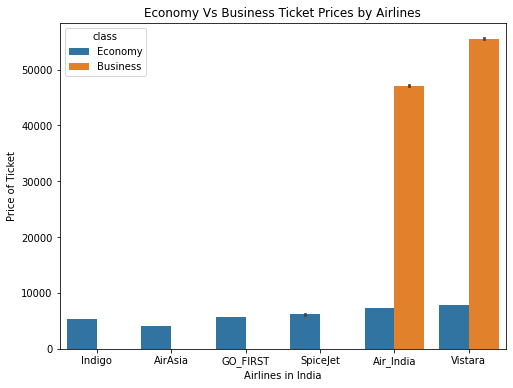

In [31]:
plt.figure(figsize=(8,6))
c = sns.barplot(x='airline', y='price', hue='class', data = df.sort_values('price'))
c.set(xlabel='Airlines in India', ylabel='Price of Ticket', title='Economy Vs Business Ticket Prices by Airlines')
plt.show(c)


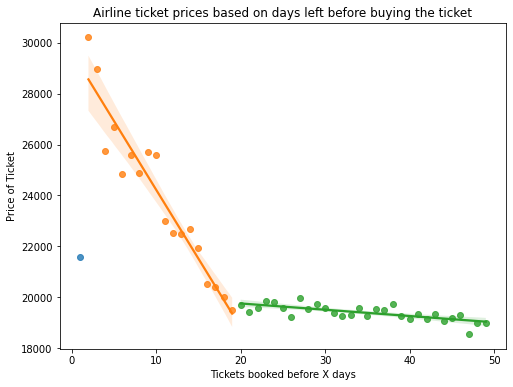

In [48]:
df_temp = df.groupby(['days_left'])['price'].mean().reset_index()
plt.figure(figsize=(8,6))
c =sns.regplot(x = df_temp.loc[df_temp['days_left'] == 1].days_left, y = df_temp.loc[df_temp['days_left'] == 1].price, data= df_temp, fit_reg= False)
c =sns.regplot(x = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].days_left, y = df_temp.loc[(df_temp['days_left'] > 1) & (df_temp['days_left'] < 20)].price, data = df_temp, fit_reg= True)
c =sns.regplot(x = df_temp.loc[df_temp['days_left'] >= 20].days_left, y = df_temp.loc[df_temp['days_left'] >= 20].price, data = df_temp, fit_reg= True)
c.set(xlabel='Tickets booked before X days', ylabel='Price of Ticket', title='Airline ticket prices based on days left before buying the ticket')
plt.show()


In [37]:
print(df_temp)

    days_left         price
0           1  21591.867151
1           2  30211.299801
2           3  28976.083569
3           4  25730.905653
4           5  26679.773368
5           6  24856.493902
6           7  25588.367351
7           8  24895.883995
8           9  25726.246072
9          10  25572.819134
10         11  22990.656070
11         12  22505.803322
12         13  22498.885384
13         14  22678.002363
14         15  21952.540852
15         16  20503.546237
16         17  20386.353949
17         18  19987.445168
18         19  19507.677375
19         20  19699.983390
20         21  19430.494058
21         22  19590.667385
22         23  19840.913451
23         24  19803.908896
24         25  19571.641791
25         26  19238.290278
26         27  19950.866195
27         28  19534.986047
28         29  19744.653119
29         30  19567.580834
30         31  19392.706612
31         32  19258.135308
32         33  19306.271739
33         34  19562.008266
34         35  19255

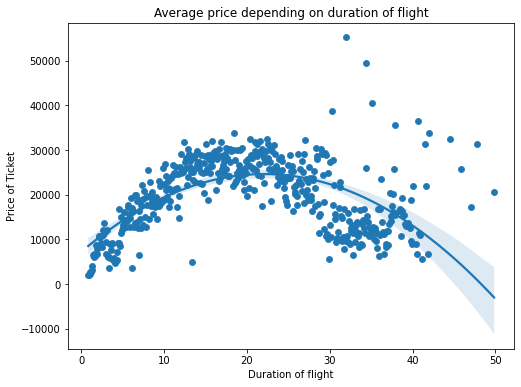

In [110]:
df_temp2 = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(8,6))
PD = sns.scatterplot(x='duration', y='price', data = df_temp2)
PD = sns.regplot(x='duration', y='price', data = df_temp2, order = 2)
PD.set(xlabel='Duration of flight', ylabel='Price of Ticket', title='Average price depending on duration of flight')
plt.show(PD)


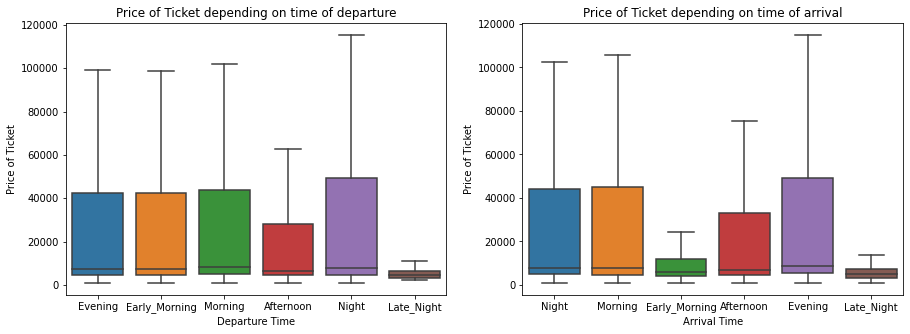

In [53]:
plt.figure(figsize=(15,5))
plt.subplot (1,2,1)
c=sns.boxplot(x = 'departure_time', y = 'price', data = df, showfliers = False)
c.set(xlabel = 'Departure Time', ylabel = 'Price of Ticket', title ='Price of Ticket depending on time of departure')
plt.subplot (1,2,2)
c=sns.boxplot(x = 'arrival_time', y = 'price', data = df, showfliers =  False)
c.set(xlabel = 'Arrival Time', ylabel = 'Price of Ticket', title = 'Price of Ticket depending on time of arrival')
plt.show()


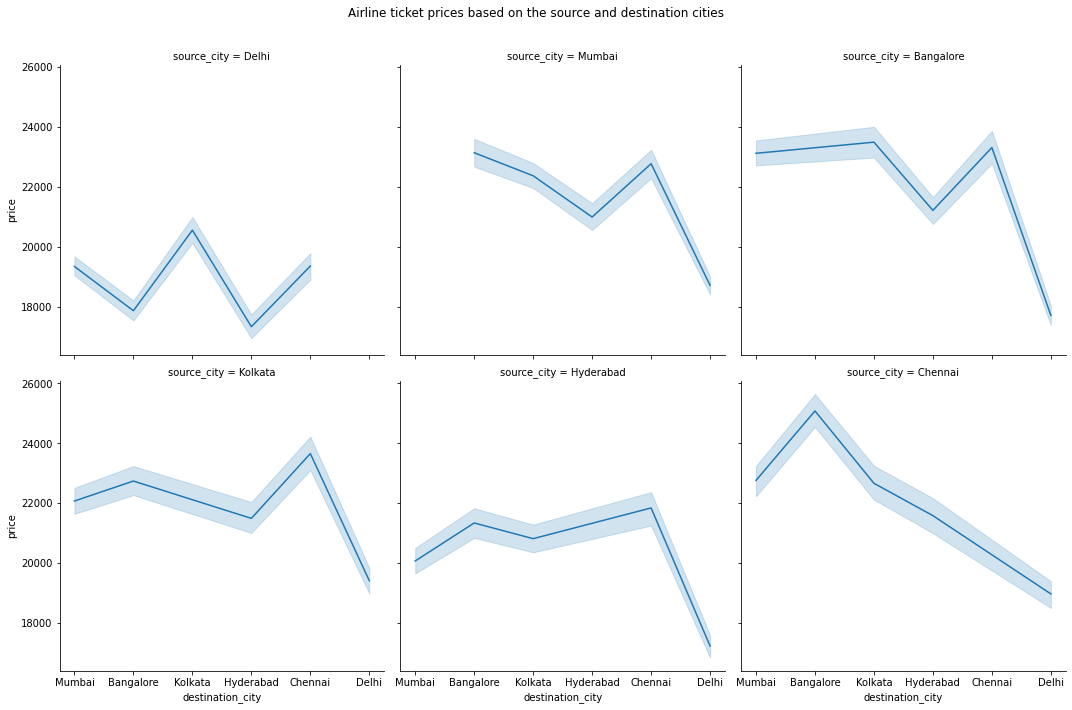

In [61]:
ax = sns.relplot(x='destination_city', y='price', col='source_city', data=df, col_wrap= 3, kind= 'line')
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle('Airline ticket prices based on the source and destination cities')
plt.show(ax)


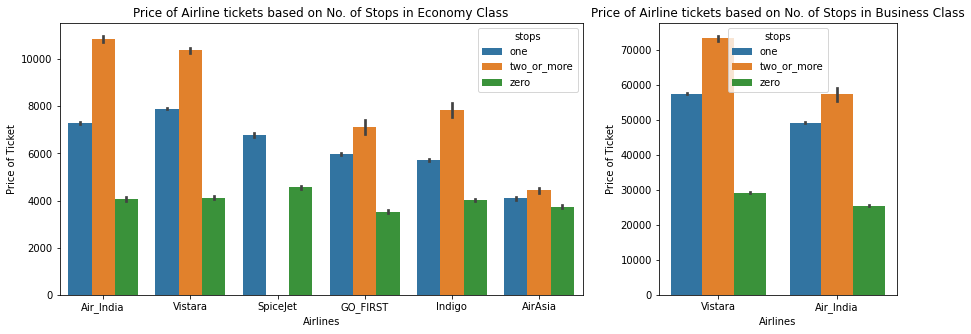

In [94]:
fig, axs = plt.subplots(1,2, gridspec_kw= {'width_ratios': [2.2,1]}, figsize = (15,5))

sns.barplot(y='price', x='airline', hue='stops', data=df.loc[df['class'] == 'Economy'].sort_values('price', ascending= False), ax = axs[0])
axs[0].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Economy Class')

sns.barplot(y='price', x='airline', hue='stops', data=df.loc[df['class'] == 'Business'].sort_values('price', ascending= False), ax = axs[1])
axs[1].set(xlabel='Airlines', ylabel='Price of Ticket', title='Price of Airline tickets based on No. of Stops in Business Class')
plt.show(fig, axs)
